# <span style="color:green"> Test the Assumptions in Linear Regression using Python and Statistical Hypothesis testing

Youtube Video Explanation Part1 : https://youtu.be/VKpncIhD2qM
 
Youtube Video Explanation Part2 : https://youtu.be/PymiDoj1_xg
  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot,residuals_plot
#https://anaconda.org/DistrictDataLabs/yellowbrick
from yellowbrick.datasets import load_concrete
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels

## <span style="color:blue"> Assumptions - 1 : No multicollinearity between independent variables

**<span style="color:red"> How to test the multicollinearity between independent variables**
    
1. correlation methods
2. VIF

### 1. Correlation Method

**<span style="color:red"> Example 1**

In [2]:
col1 = [1,2,3,4,5,6,7,8,9,10]
col2 = [2,3,4,5,6,7,8,9,10,11]
col3 = [2,3,5,7,4,8,5,8,9,10]
col4 = [2,4,7,9,10,13,14,16,17,18]

In [3]:
df = pd.DataFrame({"A":col1,"B":col2,"C":col3,"Target":col4})

In [4]:
X = df.iloc[:,0:-1]
y = df["Target"]

In [5]:
lr = LinearRegression(normalize=True)
lr.fit(X,y)

LinearRegression(normalize=True)

<AxesSubplot:>

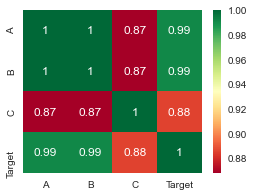

In [6]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(),cmap = "RdYlGn",annot=True)

In [7]:
print("Intercept :",lr.intercept_)
print("Coeff :",lr.coef_)

Intercept : -0.14292738275340078
Coeff : [0.8234115  0.8234115  0.20688351]


<AxesSubplot:>

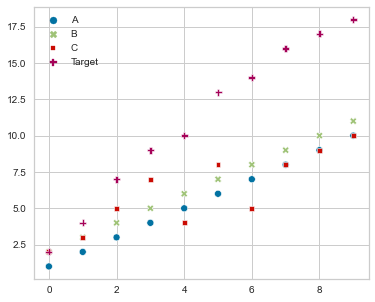

In [8]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df)

In [9]:
col1 = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
col3 = [8,10,12,14,15,18,20,22,24,26,27,29,30,31,35,36,38,39,40,41,43,45,47,49]
col2 = [30,28,27,26,25,24,23,20,18,17,16,15,14,11,10,9,8,7,6,5,4,3,2,1]
col4 = [56,55,54,53,52,50,49,48,47,42,40,38,37,35,34,32,30,29,28,27,26,25,23,22]
col5 = [10,12,14,16,18,20,22,25,27,28,30,32,34,36,38,39,43,44,48,50,54,60,64,69]

In [10]:
df = pd.DataFrame({"A":col1,"B":col2,"C":col3,"D":col4,"Target":col5})

In [11]:
df.head(8)

,A,B,C,D,Target
0,2,30,8,56,10
1,3,28,10,55,12
2,4,27,12,54,14
3,5,26,14,53,16
4,6,25,15,52,18
5,7,24,18,50,20
6,8,23,20,49,22
7,9,20,22,48,25


In [12]:
X = df.iloc[:,0:-1]
y = df["Target"]

<AxesSubplot:>

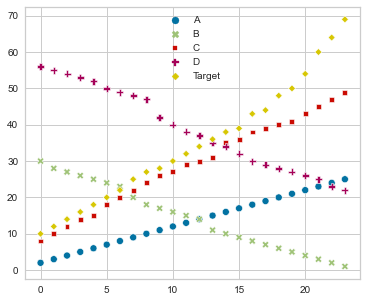

In [13]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df)

<AxesSubplot:>

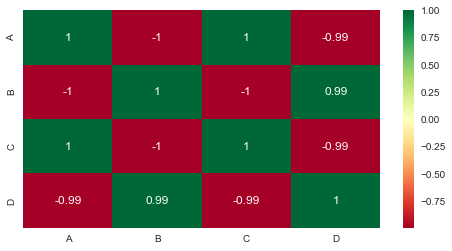

In [14]:
# Lets use plot the heatmap between features (independent variables)
import matplotlib.pyplot as plt
corr = df.iloc[:,0:-1].corr(method='pearson')
import seaborn as sns
plt.figure(figsize=(8,4))
sns.heatmap(corr,cmap = "RdYlGn",annot=True)

In [15]:
# With Dataframe correlation function
# Correlation between A and other features
df.corr(method='pearson')[0:1]

,A,B,C,D,Target
A,1.0,-0.995891,0.997833,-0.993818,0.987349


In [16]:
# With Dataframe correlation function
# Correlation between b and other features
df.corr(method='pearson')[1:2]

,A,B,C,D,Target
B,-0.995891,1.0,-0.996627,0.994711,-0.973547


In [17]:
# Lets Calculate the Pearson using the pearsonr() SciPy function
from scipy import stats
corrA_B,_ =stats.pearsonr(df.A,df.B)
corrA_C,_ =stats.pearsonr(df.A,df.C)
corrA_D,_ =stats.pearsonr(df.A,df.D)
corrA_T,_ =stats.pearsonr(df.A,df.Target)

In [18]:
print(corrA_B)
print(corrA_C)
print(corrA_D)
print(corrA_T)

-0.9958911043660755
0.9978329758272735
-0.9938177829962499
0.9873494016270216


**<span style="color:red"> Example 2**

In [19]:
# Load the dataset
# https://www.kaggle.com/c/bike-sharing-demand/data
df_bike = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Bike_Share/bikeshare.csv")

In [20]:
# Drop columns
df_bike.drop(labels=["casual","registered","datetime",'season','holiday', 'workingday', 'weather', ],inplace=True,axis =1)

In [21]:
df_bike.head()

,temp,atemp,humidity,windspeed,count
0,9.84,14.395,81,0.0,16
1,9.02,13.635,80,0.0,40
2,9.02,13.635,80,0.0,32
3,9.84,14.395,75,0.0,13
4,9.84,14.395,75,0.0,1


In [22]:
X_bike = df_bike[['temp','atemp','humidity','windspeed']]
y_bike = df_bike['count']

In [23]:
#y_bike = np.sqrt(y_bike)

In [24]:
X_train_b,X_test_b,y_train_b,y_test_b = train_test_split(X_bike,y_bike,test_size=0.33, random_state=42)

In [25]:
lr_b = LinearRegression(normalize=True)
lr_b.fit(X_train_b,y_train_b)

LinearRegression(normalize=True)

In [26]:
y_pred_b = lr_b.predict(X_train_b)

In [27]:
residuals_b = y_train_b - y_pred_b

<AxesSubplot:>

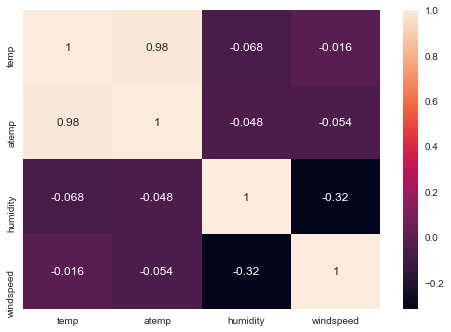

In [28]:
sns.heatmap(X_train_b.corr(),annot=True)
#temp - temperature in Celsius
#atemp - "feels like" temperature in Celsius

In [29]:
X_train_b.corr()

,temp,atemp,humidity,windspeed
temp,1.000000,0.984794,-0.068001,-0.015668
atemp,0.984794,1.000000,-0.048134,-0.053595
humidity,-0.068001,-0.048134,1.000000,-0.317181
windspeed,-0.015668,-0.053595,-0.317181,1.000000


we can see that "temp" and "atemp" both are highly corelated so we can drop one variable.

**<span style="color:red"> Problems if we have multicollinearity**
 - A key goal of regression analysis is to isolate the relationship between each independent variable and the dependent variable. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. That last portion is crucial for our further discussion about multicollinearity. The idea is that you can change the value of one independent variable and not the others. However, when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable. The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.
 - Multicollinearity reduces the precision of the estimate coefficients, which weakens the statistical power of your 
   regression model. You might not be able to trust the p-values to identify independent variables that are
   statistically significant.
    
**<span style="color:red"> Solution if we have multicollinearity**
 - Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce those independent variables which are less co-related.

Very good answers about multicollinearity

https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features

## <span style="color:blue"> Assumptions - 2 : A Linear relationship between dependent & independent variables.

**<span style="color:red"> How to test the Linearity between Independent and dependent variables**

 - nonlinearity is usually most evident in a plot of actual versus predicted values or a plot of residuals versus predicted values
    
 - The expected value of dependent variable is a straight-line function of each independent variable, holding the others fixed.
 - The effects of different independent variables on the expected value of the dependent variable are additive.

**Use regression plot to check the linearity between Independent and dependent variables**

**<span style="color:red"> Example 1**

In [30]:
cols_b = list(X_train_b.columns)
cols_b

['temp', 'atemp', 'humidity', 'windspeed']

[]

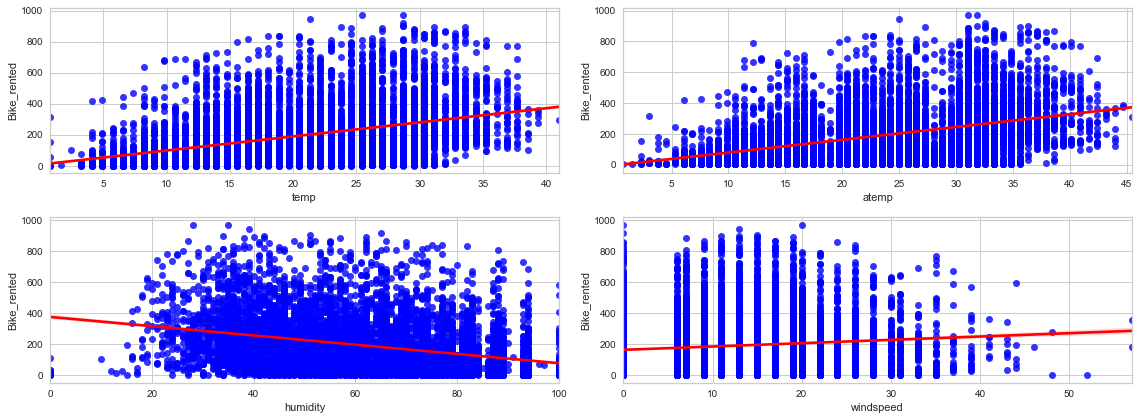

In [31]:
# Use regression plot to check the linearity between Independent and dependent variables
fig, axs = plt.subplots(2,2,figsize=(16,6))
[sns.regplot(y = pd.DataFrame({"Bike_rented":y_train_b}),x=i, data=X_train_b,scatter_kws={"color": "blue"}, 
             line_kws={"color": "red"},ax=axs.flatten()[j]) for j,i in enumerate(cols_b)]
fig.tight_layout()
plt.plot()

We can see that all the independent variables have the linear relationship with dependent variable

**<span style="color:red"> Example 2**

In [32]:
# Load a concrete regression dataset
# from yellowbrick.datasets import load_concrete
# https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength
X_c, y_c = load_concrete()
# Create the train and test data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
lr_c = LinearRegression(normalize=True)
lr_c.fit(X_train_c,y_train_c)
y_pred_c = lr_c.predict(X_train_c)
residuals_c = y_train_c - y_pred_c

In [33]:
cols_c = list(X_train_c.columns)
cols_c

['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']

[]

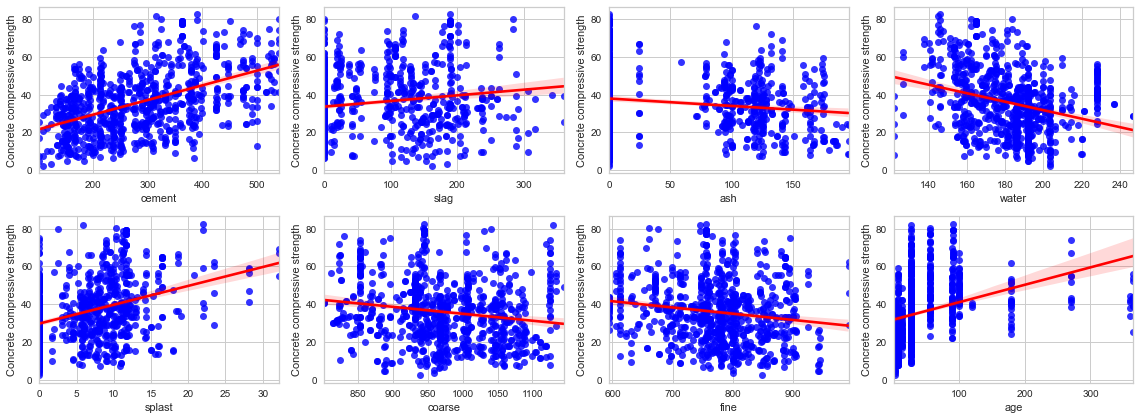

In [34]:
# Use regression plot to check the linearity between Independent and dependent variables
fig, axs = plt.subplots(2,4,figsize=(16,6))
[sns.regplot(y = pd.DataFrame({"Concrete compressive strength":y_train_c}),x=i, data=X_train_c,
             scatter_kws={"color": "blue"},line_kws={"color": "red"},ax=axs.flatten()[j]) 
 for j,i in enumerate(cols_c)]
fig.tight_layout()
plt.plot()

We can see that all the independent variables have the linear relationship with dependent variable

**<span style="color:red"> Problem if we apply LR in non-linear data**
 - Regression line will not capture much information due to distribution of data points and LR will not be able to provide the correct prediction.
    
**<span style="color:red"> Solution if we have non-linear relationship**
 - If the relationship is non-Linear we can use Non-Linear model works.

## <span style="color:blue"> Assumptions - 3 : Residuals(errors) should be homoscedastic.

**<span style="color:red"> How to test homoscedasticity**
    
1. residual vs fitted values(predicted values) plot.
2. plot the residuals versus independent variables to look for consistency there as well
2. Use statistical Breusch-Pagan / Cook – Weisberg test or White general test to detect this phenomenon.

**1. plot the residuals versus predicted values**

**<span style="color:red"> Example 1**

[]

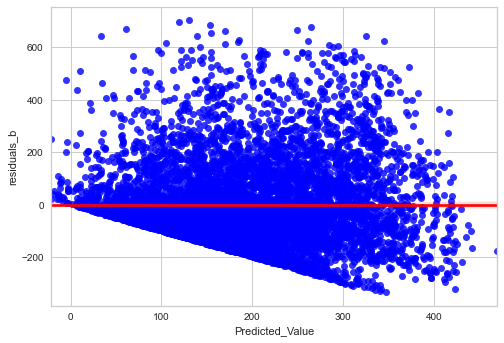

In [35]:
sns.regplot(y = residuals_b,x=(y_pred_b),scatter_kws={"color": "blue"},line_kws={"color": "red"})
plt.ylabel("residuals_b")
plt.xlabel("Predicted_Value")
plt.plot()

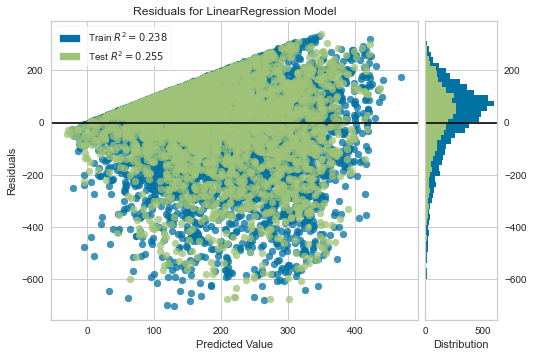

In [36]:
#res_b = residuals_plot(RandomForestRegressor(), X_train_b, y_train_b, X_test_b, y_test_b)
# from yellowbrick.regressor import ResidualsPlot,residuals_plot
res_b = residuals_plot(LinearRegression(), X_train_b, y_train_b, X_test_b, y_test_b)

**<span style="color:red"> Example 2**

[]

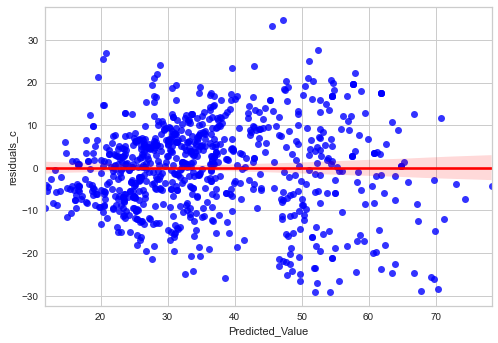

In [37]:
sns.regplot(y = residuals_c,x=y_pred_c,scatter_kws={"color": "blue"},line_kws={"color": "red"})
plt.ylabel("residuals_c")
plt.xlabel("Predicted_Value")
plt.plot()

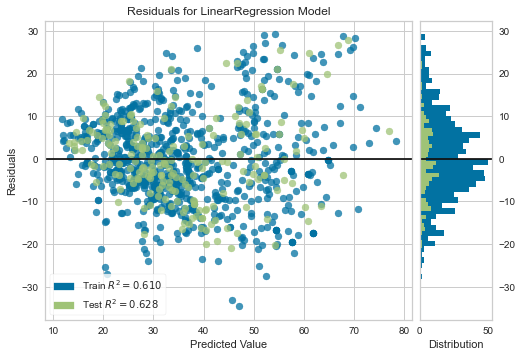

In [38]:
#res_c = residuals_plot(RandomForestRegressor(), X_train_c, y_train_c, X_test_c ,y_test_c)
res_c = residuals_plot(LinearRegression(), X_train_c, y_train_c, X_test_c, y_test_c)

**2. plot the residuals versus independent variables to look for consistency there as well**

**<span style="color:red"> Example 1**

[]

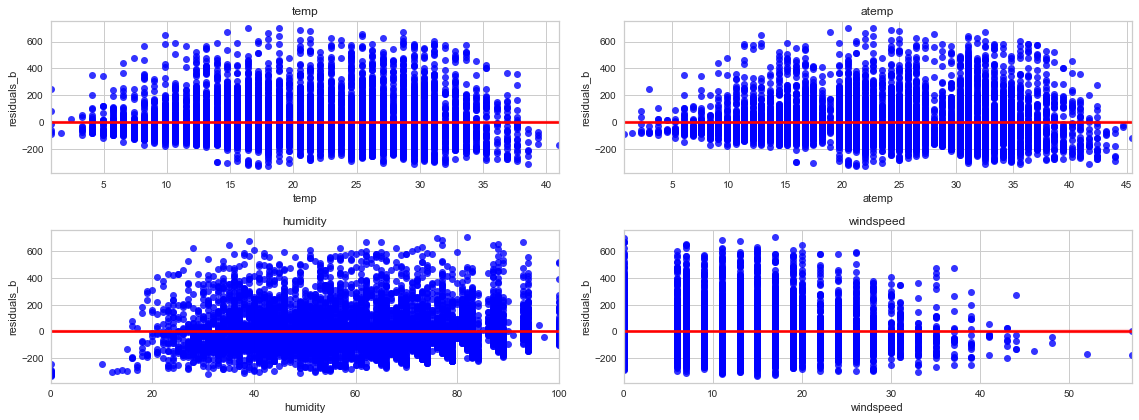

In [39]:
# Use regression plot residuals versus independent variables to look for consistency
fig, axs = plt.subplots(2,2,figsize=(16,6))
[sns.regplot(y = pd.DataFrame({"residuals_b":residuals_b}),x=i, data=X_train_b,scatter_kws={"color": "blue"}, 
             line_kws={"color": "red"},ax=axs.flatten()[j]) for j,i in enumerate(cols_b[0:])]
[axs.flatten()[j].set_title(i) for j,i in enumerate(cols_b[0:])]
fig.tight_layout()
plt.plot()

**<span style="color:red"> Example 2**

[]

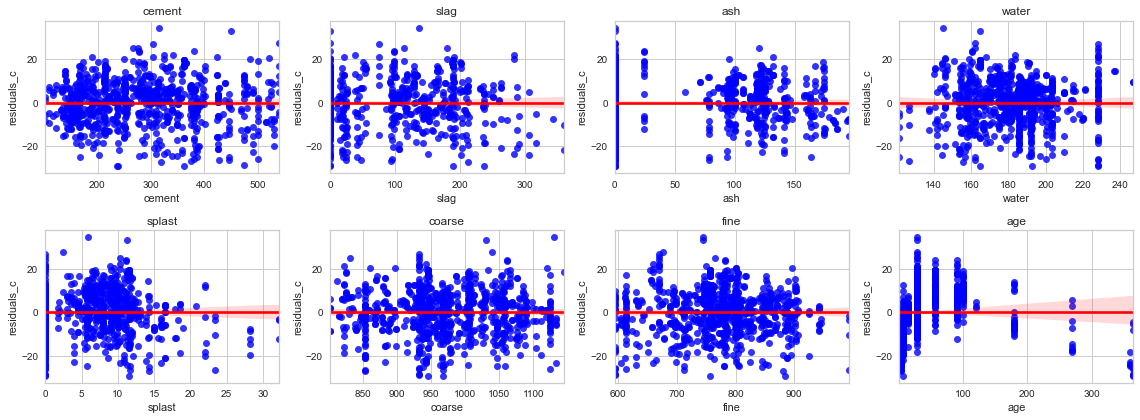

In [40]:
# Use regression plot residuals versus independent variables to look for consistency
fig, axs = plt.subplots(2,4,figsize=(16,6))
[sns.regplot(y = pd.DataFrame({"residuals_c":residuals_c}),x=i, data=X_train_c,scatter_kws={"color": "blue"}, 
             line_kws={"color": "red"},ax=axs.flatten()[j]) for j,i in enumerate(cols_c[0:])]
[axs.flatten()[j].set_title(i) for j,i in enumerate(cols_c[0:])]
fig.tight_layout()
plt.plot()

**3. Breusch-Pagan Statistical Test**

It tests whether the variance of the errors from a regression is dependent on the values of the independent variables.

**<span style="color:red"> Example 1**

In [41]:
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#import statsmodels.stats.api as sms
# first artificially add intercept to X
X_b_s = sm.add_constant(X_bike)
#slr_b = sm.OLS(np.log(y_bike),X_b_s)
slr_b = sm.OLS(y_bike,X_b_s)
slr_model_b = slr_b.fit()
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(slr_model_b.resid,slr_model_b.model.exog, robust=True)
lzip(name, test)

c:\users\dhong\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[('Lagrange multiplier statistic', 351.08361384941554),
 ('p-value', 1.0233153214687337e-74),
 ('f-value', 90.6542743736799),
 ('f p-value', 6.151224507989337e-76)]

In [42]:
test

(351.08361384941554,
 1.0233153214687337e-74,
 90.6542743736799,
 6.151224507989337e-76)

In [43]:
(slr_model_b.model.exog).shape

(10886, 5)

In [44]:
p_value = round(test[1],20)
p_value

0.0

A Breusch-Pagan test uses the following null and alternative hypotheses:

- The null hypothesis (H0): Homoscedasticity is present.
- The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

 - If p-value < level of significance (0.05); then null hypothesis is rejected.
 - If p-value > level of significance (0.05); then we fail to reject the null hypothesis.

In this example, the Lagrange multiplier statistic for the test is 351.08 and the corresponding p-value is 0.0. 
Because this p-value is less than 0.05, we fail to accept the null hypothesis. We do not have sufficient evidence to say that Homoscedasticity is present in the regression model.

**<span style="color:red"> Problem if we have heteroscedasticity**
 - Bigger residuals imply greater error in Solution.
    
**<span style="color:red"> Solution if we have heteroscedasticity**
 - To overcome heteroscedasticity, a possible way is to transform the response variable such as log(Y) or √Y. Also, we can use weighted least square method to tackle heteroscedasticity.


## <span style="color:blue"> Assumptions - 4 : Residuals should be normally distributed.

 - Technically, the normal distribution assumption is not necessary if you are willing to assume the model equation is correct and your only goal is to estimate its coefficients and generate predictions in such a way as to minimize mean squared error.  
 - Sometimes the error distribution is "skewed" by the presence of a few large outliers. 

**<span style="color:red"> How to test normality test of residuals**
    
1. KDE plot of residuals
2. Histogram of residuals
3. QQ plot
4. statistical tests of normality such as Kolmogorov-Smirnov test, Jarque–Bera test, or the Shapiro-Wilk test 

**1. KDE plot of the residuals**

**<span style="color:red"> Example 1**

<AxesSubplot:xlabel='count', ylabel='Density'>

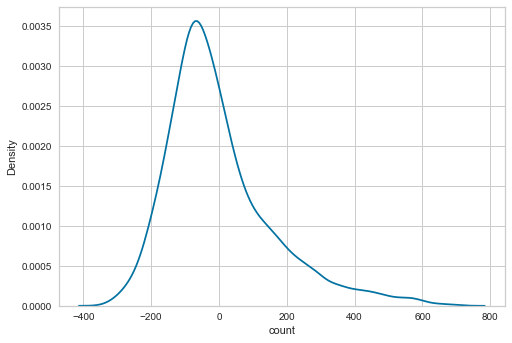

In [45]:
sns.kdeplot(residuals_b)

In [46]:
round(np.mean(residuals_b),4)

-0.0

**<span style="color:red"> Example 2**

<AxesSubplot:xlabel='strength', ylabel='Density'>

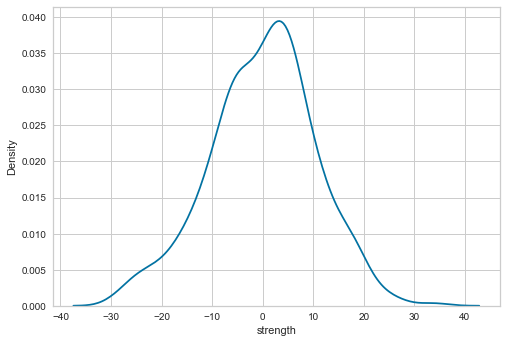

In [47]:
sns.kdeplot(residuals_c)

In [48]:
round(np.mean(residuals_c),4)

-0.0

**2. Histogram plot of the residuals**

**<span style="color:red"> Example 1**

<AxesSubplot:xlabel='count', ylabel='Count'>

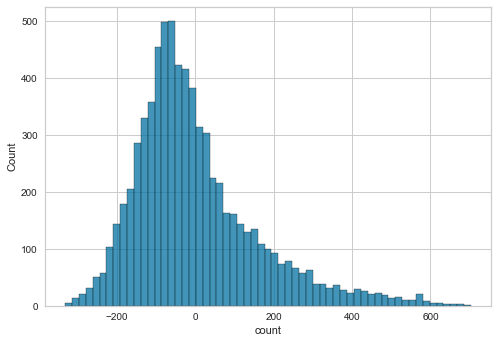

In [49]:
sns.histplot(residuals_b)

**<span style="color:red"> Example 2**

<AxesSubplot:xlabel='strength', ylabel='Count'>

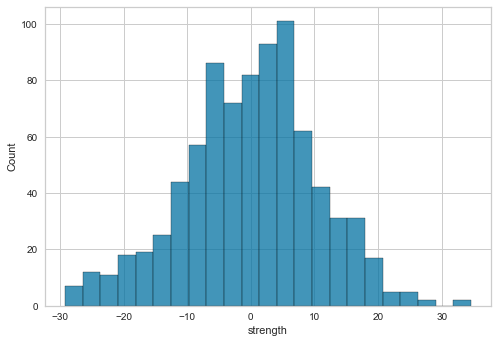

In [50]:
sns.histplot(residuals_c)

**3. normal probability plot or Quantile – Quantile(Q-Q) plot of the residuals**

**<span style="color:red"> Example 1**

c:\users\dhong\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


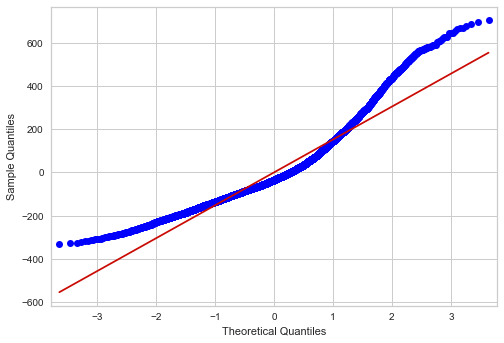

In [51]:
sm.qqplot(residuals_b, line ='r')
plt.show()
#  If the distribution is normal, the points on such a plot should fall close to the diagonal reference line. 
# we can see that error is not completely normalised.
# A bow-shaped pattern of deviations from the diagonal indicates that the residuals have excessive skewness 
# (i.e., they are not symmetrically distributed, with too many large errors in one direction). 
# An S-shaped pattern of deviations indicates that the residuals have excessive kurtosis--i.e., 
# there are either too many or two few large errors in both directions.  
#  Sometimes the problem is revealed to be that there are a few data points on one or both ends that deviate 
# significantly from the reference line ("outliers"), in which case they should get close attention. 

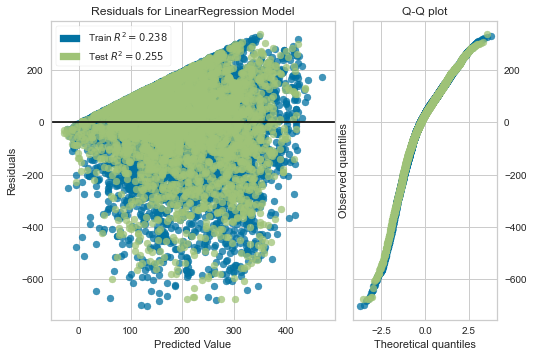

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [52]:
visualizer = ResidualsPlot(lr_b, hist=False, qqplot=True)
visualizer.fit(X_train_b, y_train_b)  # Fit the training data to the visualizer
visualizer.score(X_test_b, y_test_b)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

**<span style="color:red"> Example 2**

c:\users\dhong\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


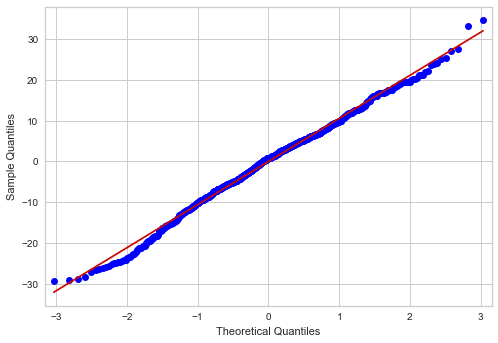

In [53]:
sm.qqplot(residuals_c, line ='r')
plt.show()
#  If the distribution is normal, the points on such a plot should fall close to the diagonal reference line. 
# we can see that error is completely normalised.

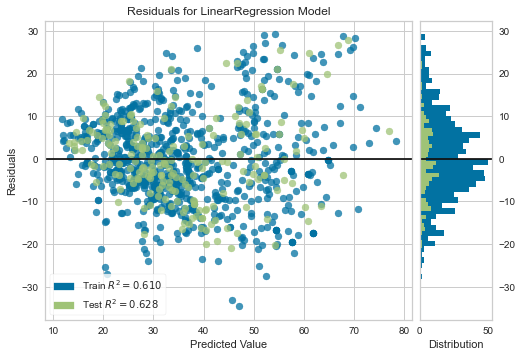

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [54]:
# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(lr_c, hist=True, qqplot=False)

visualizer.fit(X_train_c, y_train_c)  # Fit the training data to the visualizer
visualizer.score(X_test_c, y_test_c)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

**4. Jarque-Bera Statistical test**

In [55]:
# first artificially add intercept to X
#import statsmodels.stats.api as sms
X_c_s = sm.add_constant(X_c)
slr_c = sm.OLS(y_c,X_c_s)
slr_model_c = slr_c.fit()
name = ['Jarque-Bera', 'JBpvalue', 'Skew', 'Kurtosis']
test = sms.jarque_bera(slr_model_c.resid)
lzip(name, test)

c:\users\dhong\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[('Jarque-Bera', 5.305288452008198),
 ('JBpvalue', 0.07046464206228414),
 ('Skew', -0.17435746250758943),
 ('Kurtosis', 3.0449029260620795)]

In [56]:
X_c_s.shape

(1030, 9)

JB = n/6(S^2 + 1/4(K-3)^2)

where n is the number of data points, S is the sample skewness, and K is the sample kurtosis of the data.

A Jarque-Bera test uses the following null and alternative hypotheses:

- The null hypothesis (H0): Residuals are normally distributed.
- The alternative hypothesis: (Ha): Residuals are not normally distributed.

 - If p-value < level of significance (0.05); then null hypothesis is rejected.
 - If p-value > level of significance (0.05); then we fail to reject the null hypothesis.

In this example, the Jarque-Bera statistic for the test is 5.30 and the corresponding p-value is 0.0704. 
Because this p-value is greater than 0.05, we will accept the null hypothesis. We do not have sufficient evidence to say that Residuals are not normally distributed in the regression model.

**<span style="color:red"> Problem if residulas are not completety Normalised**
 - Real data rarely has errors that are perfectly normally distributed, and it may not be possible to fit your data with a model whose errors do not violate the normality assumption at the 0.05 level of significance.  It is usually better to focus more on violations of the other assumptions and/or the influence of a few outliers (which may be mainly responsible for violations of normality anyway) and to look at a normal probability plot or normal quantile plot and draw your own conclusions about whether the problem is serious and whether it is systematic.
 - One thing to keep in mind is that as the sample size increases, the likelihood of violating this assumption increases
    
**<span style="color:red"> Solution if residulas are not completety Normalised**
 - violations of normality often arise either because (a) the distributions of the dependent and/or independent variables are themselves significantly non-normal, and/or (b) the linearity assumption is violated. In such cases, a nonlinear transformation of variables might cure both problems. In the case of the two normal quantile plots above, the second model was obtained applying a natural log transformation to the variables in the first one.
 - The dependent and independent variables in a regression model do not need to be normally distributed by themselves--only the prediction errors need to be normally distributed.  (In fact, independent variables do not even need to be random, as in the case of trend or dummy or treatment or pricing variables.)  But if the distributions of some of the variables that are random are extremely asymmetric or long-tailed, it may be hard to fit them into a linear model whose errors will be normally distributed, and explaining the shape of their distributions may be an interesting topic all by itself.  Keep in mind that the normal error assumption is usually justified by appeal to the central limit theorem, which holds in the case where many random variations are added together.  If the underlying sources of randomness are not interacting additively, this argument fails to hold.
 - In some cases, the problem with the error distribution is mainly due to one or two very large errors. Such values should be scrutinized closely: are they genuine (i.e., not the result of data entry errors), are they explainable, are similar events likely to occur again in the future, and how influential are they in your model-fitting results? If they are merely errors or if they can be explained as unique events not likely to be repeated, then you may have cause to remove them. In some cases, however, it may be that the extreme values in the data provide the most useful information about values of some of the coefficients and/or provide the most realistic guide to the magnitudes of forecast errors. 

## <span style="color:blue"> Assumptions - 5 : No autocorrelation in the regression residuals

Autocorrelation occurs when the residuals are not independent from each other.  In other words when the value of y(x+1) is not independent from the value of y(x).

Autocorrelation refers to the degree of correlation between the values of the same variables across different observations in the data.  The concept of autocorrelation is most often discussed in the context of time series data in which observations occur at different points in time (e.g., air temperature measured on different days of the month).  For example, one might expect the air temperature on the 1st day of the month to be more similar to the temperature on the 2nd day compared to the 31st day.  If the temperature values that occurred closer together in time are, in fact, more similar than the temperature values that occurred farther apart in time, the data would be autocorrelated.

However, autocorrelation can also occur in cross-sectional data when the observations are related in some other way.  In a survey, for instance, one might expect people from nearby geographic locations to provide more similar answers to each other than people who are more geographically distant.  Similarly, students from the same class might perform more similarly to each other than students from different classes.  Thus, autocorrelation can occur if observations are dependent in aspects other than time.  Autocorrelation can cause problems in conventional analyses (such as ordinary least squares regression) that assume independence of observations.

**<span style="color:red"> How to test autocorrelation in residuals**
    
A common method of testing for autocorrelation is the Durbin-Watson test. 
    
Look for Durbin – Watson (DW) statistic.It must lie between 0 and 4. 
 - If DW = 2, or close to it, implies no autocorrelation
 - 0 < DW < 2 implies positive autocorrelation 
 - while 2 < DW < 4 indicates negative autocorrelation
    
Also, we can see residual vs time plot and look for the seasonal or correlated pattern in residual values in time series analysis.

**<span style="color:red"> Example 1**

In [57]:
# first artificially add intercept to X
X_c_s = sm.add_constant(X_c)
slr_c = sm.OLS(y_c,X_c_s)
slr_model_c = slr_c.fit()
statsmodels.stats.stattools.durbin_watson(slr_model_c.resid)

1.2814906694343293

Given the statistical value of 1.28, the test provides evidence that there is less positive autocorrelation present and it means that residual error terms has very less positive autocorrelation and is little bit dependent.

**<span style="color:red"> Example 2**

In [58]:
# first artificially add intercept to X
X_b_s = sm.add_constant(X_bike)
slr_b = sm.OLS(y_bike,X_b_s)
slr_model_b = slr_b.fit()
statsmodels.stats.stattools.durbin_watson(slr_model_b.resid)

0.4197044475704702

Given the statistical value of 0.4197, the test provides evidence that there is highly positive autocorrelation present and it means that residual error terms has highly positive autocorrelation and is little bit dependent

**<span style="color:red"> Problem if autocorrelation in residuals**

1. The presence of correlation in error terms drastically reduces model’s accuracy. 
2. It causes confidence intervals and prediction intervals to be narrower. Narrower confidence interval means that a 95% confidence interval would have lesser probability than 0.95 that it would contain the actual value of coefficients.
3. For example, the least square coefficient of X¹ is 15.02 and its standard error is 2.08 (without autocorrelation).  But in presence of autocorrelation, the standard error reduces to 1.20. As a result, the prediction interval narrows down to (13.82, 16.22) from (12.94, 17.10).bAlso, lower standard errors would cause the associated p-values to be lower than actual. This will make us incorrectly conclude a parameter to be statistically significant

**<span style="color:red"> Solution if autocorrelation in residuals**

 - Adding other variables as independent variables
 - Transforming variables into different functional forms
     - Deviation from average values
     - Log form
     - Exponential form
     - Annualised
 - Clustering on different time invariant factors
 - Experimenting with model specification

Many different variables can be introduced to the model to reduce the autocorrelations. For example, instead of only one lag of the dependent in the model, more lag of the dependent variables can be experimented, as the value one year ago may be more important than the value one quarter ago. A few other variables, such as the  gross domestic product (GDP) index instead of household income can be experimented with. Interaction between weather and seasonal variables can be also experimented. Most of these variables may proved not to be adding any more value to the model specifications.

Many variables can be transformed into different forms and tested to see if the autocorrelations were reduced. Generally, the deviation from the average values worked best for weather data. Log form or exponential form may or may not make improvements. Annualising the data is supposed to remove any seasonal effects.

Clustering based on variables, such as income and lot size, can improve the autocorrelations problems. This may be due to the phenomenon of seasonality, with houses reacting differently to the same weather conditions. However, the p values of estimates can get worse as the number of households within each cluster is smaller than the whole segment. Hence, the clustering analysis can be used to identify outliers and appropriate actions can be taken.